<a href="https://colab.research.google.com/github/Darsha97/EC7212-Computer-Vision-and-Image-Processing/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install opencv-python-headless
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from google.colab import files
from IPython.display import Image, display

uploaded = files.upload()
img_path = list(uploaded.keys())[0]


Saving image.jpeg to image (1).jpeg


Enter number of intensity levels (power of 2 between 2 and 256): 2


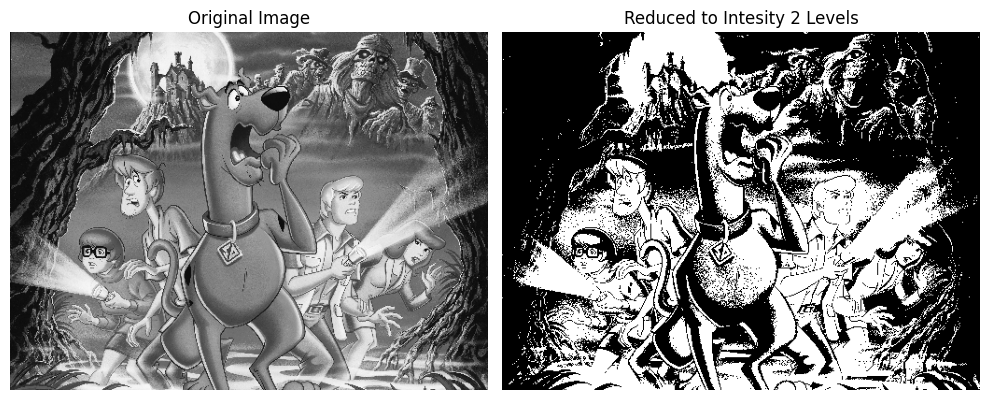

In [ ]:
#  Q1: Reduce Intensity Levels (2 to 256)
def show_q1(img):
    levels = int(input("Enter number of intensity levels (power of 2 between 2 and 256): "))
    reduced = reduce_intensity_levels(img, levels)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(reduced, cmap='gray')
    axes[1].set_title(f"Reduced to Intesity {levels} Levels")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
gray_img = cv2.resize(gray_img, (512, int(512 * gray_img.shape[0] / gray_img.shape[1])))
show_q1(gray_img)


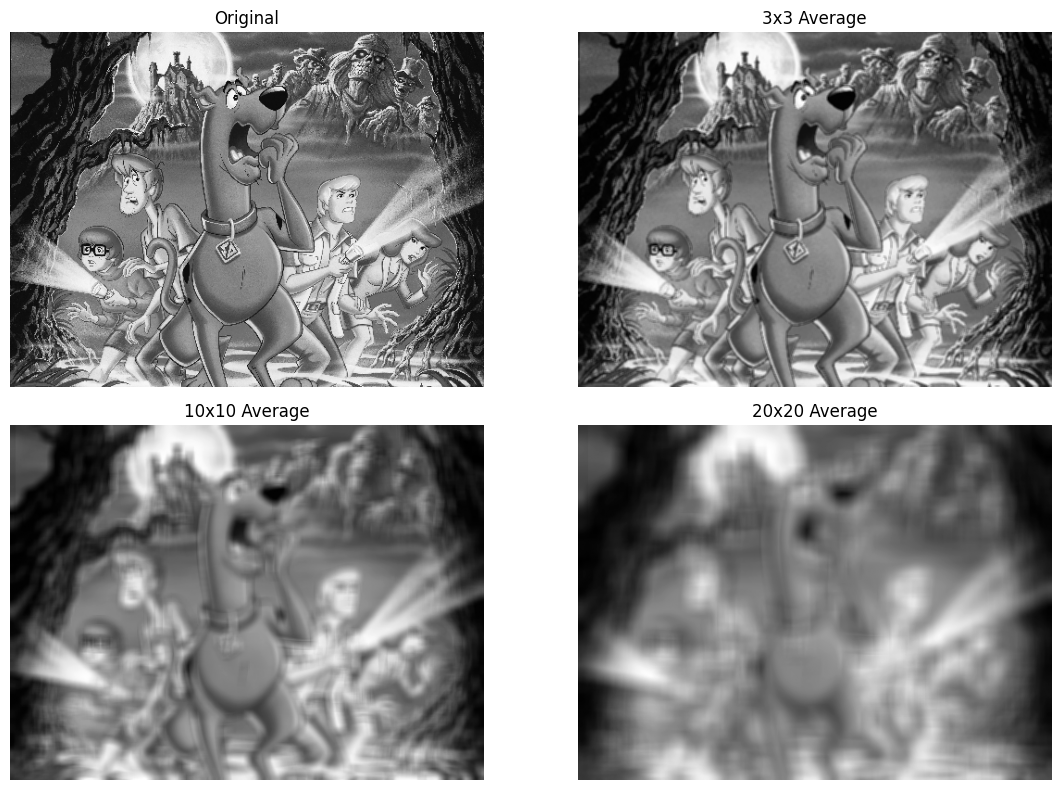

In [ ]:
#  Q2: Spatial Averaging (3x3, 10x10, 20x20)

def spatial_averaging(img, kernels=[(3,3), (10,10), (20,20)]):
    results = [img]
    for k in kernels:
        results.append(cv2.blur(img, k))

    plt.figure(figsize=(12, 8))
    titles = ['Original'] + [f"{k[0]}x{k[1]} Average" for k in kernels]
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(results[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

spatial_averaging(gray_img)


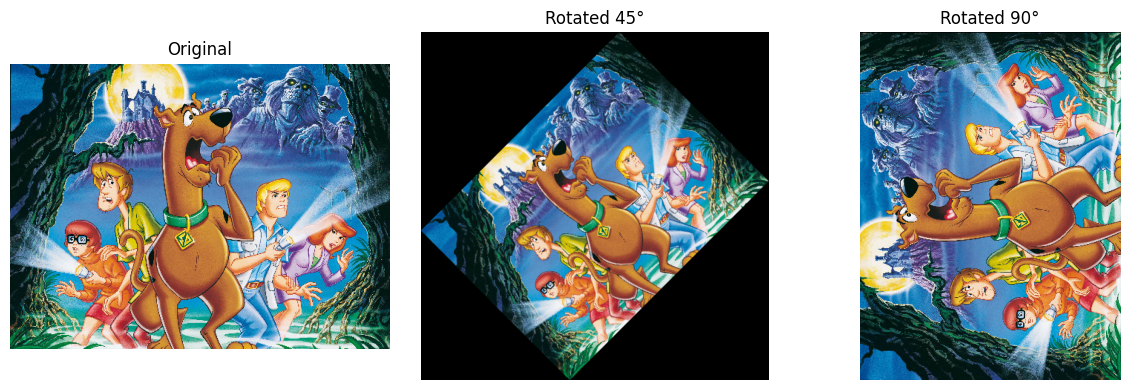

In [ ]:
#  Q3: Rotate Image 45° and 90°

def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    abs_cos = abs(mat[0, 0])
    abs_sin = abs(mat[0, 1])
    new_w = int(h * abs_sin + w * abs_cos)
    new_h = int(h * abs_cos + w * abs_sin)
    mat[0, 2] += new_w // 2 - center[0]
    mat[1, 2] += new_h // 2 - center[1]
    return cv2.warpAffine(img, mat, (new_w, new_h))

color_img = cv2.imread(img_path)
color_img = cv2.resize(color_img, (512, int(512 * color_img.shape[0] / color_img.shape[1])))

rot45 = rotate_image(color_img, 45)
rot90 = rotate_image(color_img, 90)

plt.figure(figsize=(12,4))
for i, img in enumerate([color_img, rot45, rot90]):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(["Original", "Rotated 45°", "Rotated 90°"][i])
    plt.axis('off')
plt.tight_layout()
plt.show()


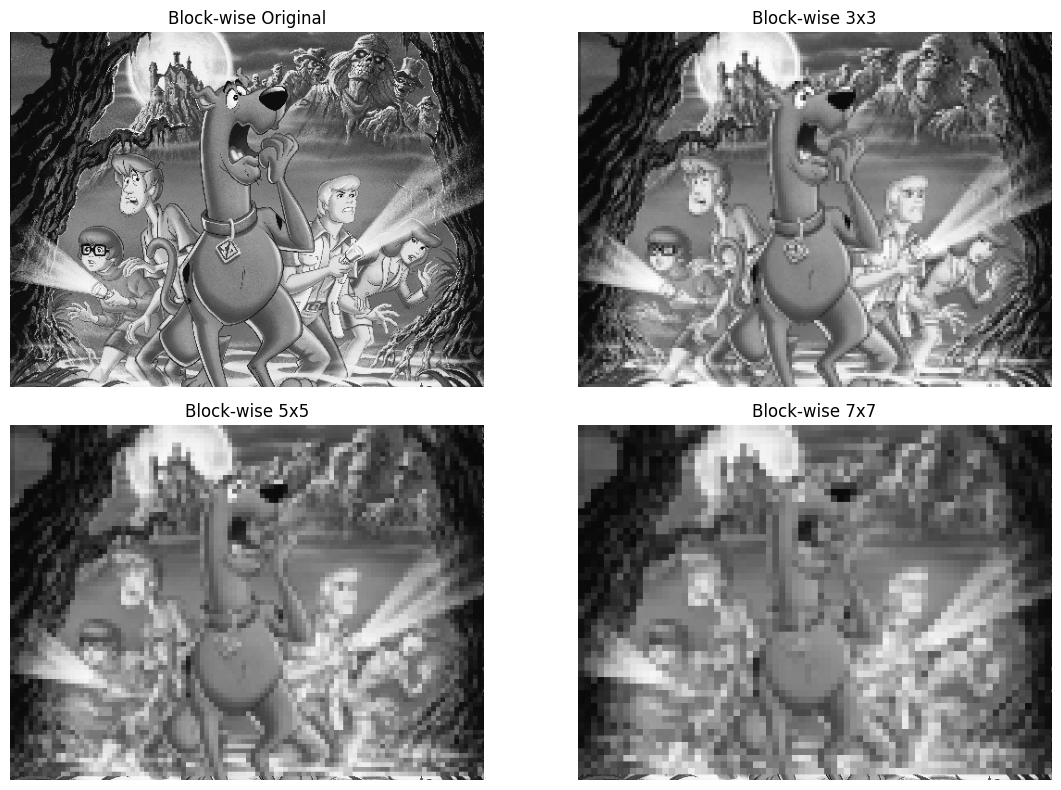

In [ ]:
#  Q4: Block-wise Averaging (3x3, 5x5, 7x7) — Colab-compatible version

def blockwise_average(img, block_size):
    """
    Applies block-wise averaging (non-overlapping) to the grayscale image.
    """
    h, w = img.shape
    result = img.copy()
    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = img[i:i + block_size, j:j + block_size]
            avg = int(np.mean(block))
            result[i:i + block_size, j:j + block_size] = avg
    return result

def show_blockwise_averaging(img):
    sizes = [3, 5, 7]
    results = [img] + [blockwise_average(img, s) for s in sizes]
    titles = ["Original", "3x3", "5x5", "7x7"]

    plt.figure(figsize=(12, 8))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(results[i], cmap='gray')
        plt.title(f"Block-wise {titles[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
gray_img = cv2.resize(gray_img, (512, int(512 * gray_img.shape[0] / gray_img.shape[1])))

show_blockwise_averaging(gray_img)
